# Multiclass Image Classification using CNN (CIFAR-10 Example)


In [2]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten labels
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Class names
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [4]:

# Build CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:

# Train model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3525 - loss: 1.7446 - val_accuracy: 0.5391 - val_loss: 1.2647
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.5664 - loss: 1.2112 - val_accuracy: 0.6134 - val_loss: 1.1169
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.6328 - loss: 1.0469 - val_accuracy: 0.6533 - val_loss: 1.0027
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.6655 - loss: 0.9510 - val_accuracy: 0.6558 - val_loss: 1.0070
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6977 - loss: 0.8662 - val_accuracy: 0.6428 - val_loss: 1.0261
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7212 - loss: 0.8107 - val_accuracy: 0.6773 - val_loss: 0.9366
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7338 - loss: 0.7613 - val_accuracy: 0.7027 - val_loss: 0.8761
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7495 -

In [7]:

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


313/313 - 4s - 13ms/step - accuracy: 0.6867 - loss: 0.9293

Test accuracy: 0.69


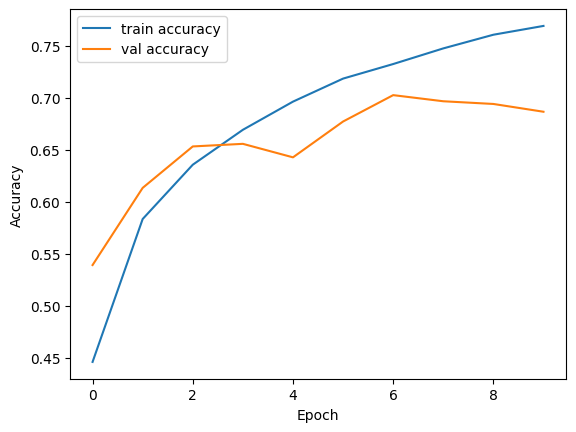

In [8]:

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


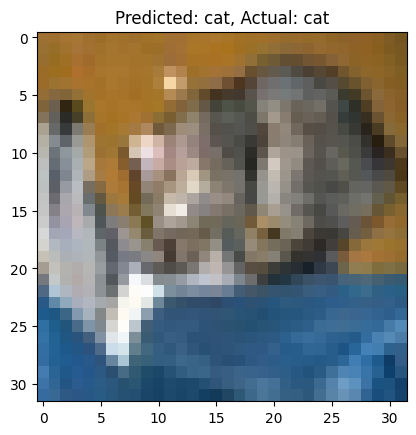

In [9]:

# Make prediction on one image
index = 0
plt.imshow(X_test[index])
predicted_class = class_names[np.argmax(model.predict(X_test[index:index+1]))]
plt.title(f"Predicted: {predicted_class}, Actual: {class_names[y_test[index]]}")
plt.show()
